# TAREA 4 - SIMULACIÓN MONTECARLO - SARTENES

### Edwin Fernando Villarraga Ossa

## Resumen del Problema



### Variable de Salida
- Utilidades del ejercicio.

### Variables de Decisión
-  ¿cuántos sartenes especiales comprar?


### Variables Inciertas
- La demanda sigue una normal con promedio 100 y desviación 25. Redondee esta variable a números enteros)

- El precio de venta a la cadena de descuento sigue una distribución lognormal, con 𝜇 = 2.7 y 𝜎 = 0.008. (Esto implica que la media de la distribución sea de 15 y desviación estándar de 2). Redondee esta variable a dos decimales.


### Variables Ciertas

- Costo de sartenes especiales: 22 c/u

- Costo de sartenes comunes de cobre: 32 c/u

- Precio de venta de los sartenes: 35 c/u






#### 1. Se cargan las librerías requeridas para hacer las simulaciones

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import random
from scipy import stats
sns.set_style('whitegrid')

#### 2. Se definen las variables aleatorias inciertas

para efecto de reproducibilidad del documento se asigna un valor fijo para la semilla del algoritmo generador de números aleatorios

In [106]:
random.seed(100)

In [107]:
N = 1000   #número de datos a simular
demanda = np.random.normal(loc=100, scale=25, size=N).round(0)
precio_desc = np.random.lognormal(mean=2.7, sigma=0.008, size=N).round(2)

a continuación se visualizan los primeros 10 datos de cada variable

In [108]:
demanda[0:9]

array([ 56., 109., 129.,  94., 125., 113., 106.,  73.,  95.])

In [109]:
precio_desc[0:9]

array([14.85, 14.8 , 14.9 , 14.86, 15.01, 14.81, 15.  , 14.79, 15.07])

Cada vez que se corre el código, los datos de variables inciertas cambian, dado que los datos provienen de una simulación aleatoría

#### 3. Se definen las variables ciertas

In [110]:
costo_sarten_esp = 22
costo_sarten_comun = 32
precio_venta_sarten = 35

#### 4. Se crea la simulación Montecarlo para un valor dado de la variable de decisión

los resutados se guardan en un array numpy.  En la definición de variables se estableción que se realizarían 1000 iteraciones.  Se define la variable de decisión numero de sartenes a importar: dec_sartenes

In [111]:
def utilidad_MC(N, N_sartenes):
    '''
    N: es el numero de iteraciones de la simulación Montecarlo.  se definió en la variables pero se puede modificar
    N_sartenes: es el numero de sartenes a comprar, se definió externamente pero se puede modificar
    '''
    demanda = np.random.normal(loc=100, scale=25, size=N).round(0)
    precio_desc = np.random.lognormal(mean=2.7, sigma=0.008, size=N).round(2)
    df = pd.DataFrame(index=range(N), data={'demanda': demanda,
                                               'precio_desc': precio_desc})
    df['Sartenes_Comprados'] =N_sartenes
    df['exceso_demanda'] = df['demanda']-N_sartenes
    
    df['utilidad_ed'] = np.where(df['exceso_demanda']>=0,N_sartenes*(35-22)+(df['demanda']-N_sartenes)*(35-32),0) #utilidades en 
    #caso de exceso de demanda
    df['utilidad_dd'] = np.where(df['exceso_demanda']<0,df['demanda']*(35-22)+(N_sartenes-df['demanda'])*(df['precio_desc']-22),0) #utilidad en
    #caso de exceso de demanda negativa  deficit de demanda
    df['utilidad'] = df['utilidad_dd']+df['utilidad_ed']
    
    return df

In [112]:
utilidad = utilidad_MC(N, N_sartenes=100)

A continuación se muestrasn 5 filas del dataframe obtenido para el caso de comprar 100 sartenes

In [113]:
utilidad.head(5)

,demanda,precio_desc,Sartenes_Comprados,exceso_demanda,utilidad_ed,utilidad_dd,utilidad
0,99.0,14.87,100,-1.0,0.0,1279.87,1279.87
1,87.0,15.17,100,-13.0,0.0,1042.21,1042.21
2,110.0,14.92,100,10.0,1330.0,0.00,1330.00
3,53.0,14.94,100,-47.0,0.0,357.18,357.18
4,64.0,14.71,100,-36.0,0.0,569.56,569.56


### 5. Cálculo de simulación Montecarlo para tres niveles de variable de decisión

Se evalúan los escenarios de utilidad esperada (ditribución de probabilidad) para los casos de comprar 95, 110 y 115 sartenes especiales.  En caso de requerirse más valores, simplemente se debe ampliar la cantidad de datos en el diccionario.

In [114]:
Opciones_Sartenes = {"compra_95":95, "compra_110":110, "compra_115":115}

se crea un dataframe vacío para almacenar las simulaciones de utilidad

In [115]:
simulaciones_utilidad=pd.DataFrame()

In [116]:
type(simulaciones_utilidad)

pandas.core.frame.DataFrame

Mediante una iteración sobre el diccionario previamente creado, se llena el dataframe con los resultados de las simulaciones

In [117]:
for k,v in Opciones_Sartenes.items():
    #print(k)
    #print(v)
    utilidad_temp = utilidad_MC(N, N_sartenes=v)
    simulaciones_utilidad[k]=utilidad_temp['utilidad']
    

In [118]:
simulaciones_utilidad.head(5)

,compra_95,compra_110,compra_115
0,382.82,1535.00,509.61
1,1316.00,1448.00,628.12
2,1175.33,881.90,1507.00
3,1093.74,781.68,791.85
4,1322.00,724.75,1510.00


### 6. Cálculos para la toma de decisiones

#### Histograma de la utilidad en la compra de 95 sartenes

Text(0.5, 1.0, 'Histograma y Curva de Densidad de Frecuencia Compra de 95 Sartenes')

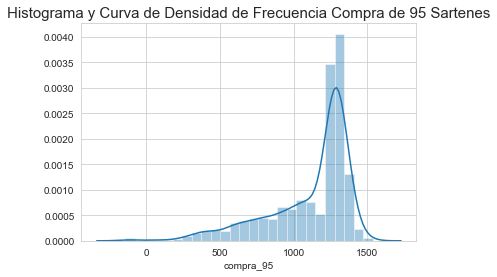

In [119]:
sns.distplot(simulaciones_utilidad['compra_95'])
plt.title('Histograma y Curva de Densidad de Frecuencia Compra de 95 Sartenes', fontsize=15)

#### Histograma de la utilidad en la compra de 110 sartenes

Text(0.5, 1.0, 'Histograma y Curva de Densidad de Frecuencia Compra de 110 Sartenes')

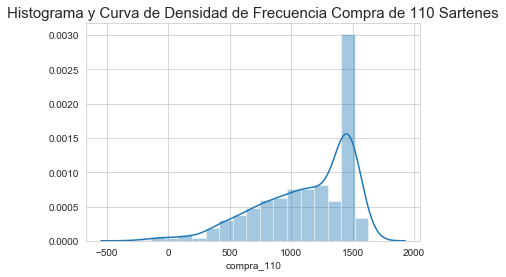

In [120]:
sns.distplot(simulaciones_utilidad['compra_110'])
plt.title('Histograma y Curva de Densidad de Frecuencia Compra de 110 Sartenes', fontsize=15)

#### Histograma de la utilidad en la compra de 115 sartenes

Text(0.5, 1.0, 'Histograma y Curva de Densidad de Frecuencia Compra de 110 Sartenes')

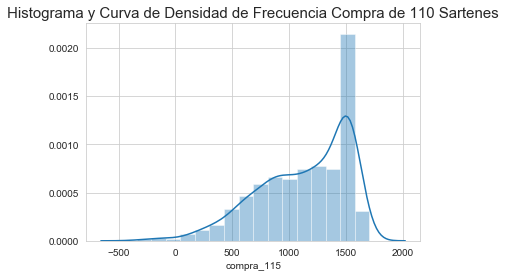

In [121]:
sns.distplot(simulaciones_utilidad['compra_115'])
plt.title('Histograma y Curva de Densidad de Frecuencia Compra de 110 Sartenes', fontsize=15)

#### Valor Esperado, Desviación Estándar, Mímino, Máximo, Percentil 5

In [122]:
Valor_Esperado = simulaciones_utilidad.mean()
Valor_Esperado

compra_95     1113.20319
compra_110    1121.64391
compra_115    1129.26938
dtype: float64

In [123]:
Desv_estandar = simulaciones_utilidad.std()
Desv_estandar

compra_95     281.517747
compra_110    375.088787
compra_115    395.801597
dtype: float64

In [124]:
Minimo = simulaciones_utilidad.min()
Minimo

compra_95    -142.00
compra_110   -246.60
compra_115   -341.32
dtype: float64

In [125]:
Maximo = simulaciones_utilidad.max()
Maximo

compra_95     1535.0
compra_110    1628.0
compra_115    1708.0
dtype: float64

In [126]:
Percentil_5 = simulaciones_utilidad.quantile(q=0.05, axis=0)
Percentil_5

compra_95     526.738
compra_110    421.425
compra_115    376.551
Name: 0.05, dtype: float64

A continuación la tabla que resumen los resultados obtenidos

In [136]:
prob_menor_1000_95 = stats.percentileofscore(simulaciones_utilidad['compra_95'],1000)

In [137]:
prob_menor_1000_110 =stats.percentileofscore(simulaciones_utilidad['compra_110'],1000)

In [138]:
prob_menor_1000_115 = stats.percentileofscore(simulaciones_utilidad['compra_115'],1000)

In [130]:
Resultados = pd.DataFrame()

In [139]:
Resultados['Valor_Esperado'] = Valor_Esperado
Resultados['Desv_estandar'] = Desv_estandar
Resultados['Minimo'] = Minimo
Resultados['Maximo'] = Maximo
Resultados['Percentil_5'] = Percentil_5
Resultados['Prob_utilidad_menor_1000']=prob_menor_1000_95
Resultados.at['compra_110','Prob_utilidad_menor_1000'] = prob_menor_1000_110
Resultados.at['compra_115','Prob_utilidad_menor_1000'] = prob_menor_1000_115
Resultados

,Valor_Esperado,Desv_estandar,Minimo,Maximo,Percentil_5,Prob_utilidad_menor_1000
compra_95,1113.20319,281.517747,-142.00,1535.0,526.738,26.4
compra_110,1121.64391,375.088787,-246.60,1628.0,421.425,33.5
compra_115,1129.26938,395.801597,-341.32,1708.0,376.551,35.8


### 7. Criterios de Decisión

#### a) Dominancia estocástica

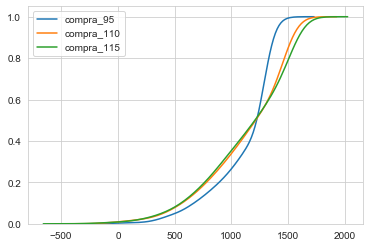

In [132]:
for col in simulaciones_utilidad:
    sns.kdeplot(simulaciones_utilidad[col], cumulative= True)

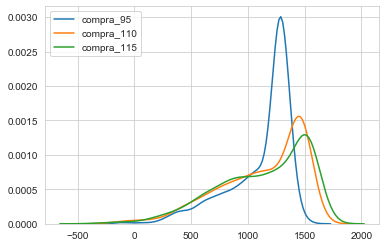

In [133]:
for col in simulaciones_utilidad:
    sns.kdeplot(simulaciones_utilidad[col], cumulative= False)

De las gráficas anteriores se observa que no existe dominancia estocástica.  Sin embargo en torno a la utilidad de 1000, domina la opción de comprar 95 sartenes especiales.

#### B) Criterio Máximo Valor Esperado

A continuación se cálcula el máximo valor esperado que corresponde a la opción de comprar 115 sartenes

In [141]:
max(Resultados['Valor_Esperado'])

1129.2693799999995

#### C) Criterio Mínima Desviación Estándar

A continuación se cálcula la mínima desviación estándar que corresponde a la opción de comprar 95 sartenes

In [143]:
min(Resultados['Desv_estandar'])

281.5177471863983

#### D) Críterio pesimista maximin

A continuación se cálcula el máximo de los mínimos corresponde a la opción de comprar 95 sartenes

In [145]:
max(Resultados['Minimo'])

-142.0

#### E) Criterio Optimista maximax

A continuación se cálcula el máximo de los máximos que corresponde a la opción de comprar 115 sartenes

In [146]:
max(Resultados['Maximo'])

1708.0

#### F) Críterio 𝛼 −fractil

A continuación se cálcula el valor mínimo con un alpha = 0.05. Bajo este criterio se elie la opción con mayor utilidad en el percentil 5.  En este caso corresponde a la opción de comprar 95 sartenes especiales

In [148]:
max(Resultados['Percentil_5'])

526.7380000000002

#### G) Críterio 𝛽 −robustez

Para una utilidad de 1000 se elige la opción cuya probabilidad de superar dicha meta sea mayor. Equivalente a minimizar la probabilidad de que la utilidad sea menor a 1000.  En este caso es mejor la opción de comprar 95 sartenes especiales.

In [150]:
min(Resultados['Prob_utilidad_menor_1000'])

26.4

## RESUMEN RESULTADOS DE CRÍTERIOS

In [151]:
Criterios = ['Dominancia_Estocastica','Valor_Esperado','Desviacion_Estandar','Maximin','Maximax','𝛼−fractil','𝛽−robustez']
Mejor_Opcion = ['Comprar_95','Comprar_115','Comprar_95','Comprar_95','Comprar_115','Comprar_95','Comprar_95']
tuples=list(zip(Criterios,Mejor_Opcion))

In [152]:
final=pd.DataFrame(tuples, columns = ['CRITERIO','DECISIÓN'])
final

,CRITERIO,DECISIÓN
0,Dominancia_Estocastica,Comprar_95
1,Valor_Esperado,Comprar_115
2,Desviacion_Estandar,Comprar_95
3,Maximin,Comprar_95
4,Maximax,Comprar_115
5,𝛼−fractil,Comprar_95
6,𝛽−robustez,Comprar_95


Se elige la opción de comprar 95 sartenes especiales por tener el menor riesgo